<div style="text-align: center; font-size: 36px;">
    Student Pledge
</div>

By answering the questions in this notebook, I pledge that I will **not use any AI tools or external sources** to assist me in completing this exam. I affirm that the work submitted is entirely my own and was completed without any form of plagiarism or external help. I understand that any violation of these terms will result in **serious consequences** as per the institute's policy.

I agree to the above terms and conditions by submitting this notebook.

---

### Important:
- You **must not delete** this cell or any part of this notebook.
- All answers **must be written below** the respective cells for each question.
- **Deleting or altering this cell** will result in **your submission not being accepted**.
- Submit the same notebook file with your code solutions.

## Mayur Khekare

### P2422037

# **Project Overview**

Cardiovascular diseases are among the leading causes of death worldwide. Predicting the risk of coronary heart disease (CHD) can significantly contribute to early diagnosis and treatment. This dataset contains patient data from the Framingham Heart Study. Your goal is to analyze the data, perform feature engineering, and build classification models to predict whether a patient has a 10-year risk of CHD.

---

## **Dataset Description**

The dataset is from an ongoing cardiovascular study on residents of Framingham, Massachusetts. It includes over 4,240 records with 15 attributes. The classification goal is to predict the **10-year risk of future coronary heart disease (CHD)**.

### **Features**
- **sex**: Male (0) or Female (1) *(Nominal)*  
- **age**: Age of the patient *(Continuous)*  
- **currentSmoker**: Whether the patient is a current smoker *(Nominal)*  
- **cigsPerDay**: Average number of cigarettes smoked per day *(Continuous)*  
- **BPMeds**: Whether the patient is on blood pressure medication *(Nominal)*  
- **prevalentStroke**: History of stroke *(Nominal)*  
- **prevalentHyp**: Hypertensive status *(Nominal)*  
- **diabetes**: Presence of diabetes *(Nominal)*  
- **totChol**: Total cholesterol level *(Continuous)*  
- **sysBP**: Systolic blood pressure *(Continuous)*  
- **diaBP**: Diastolic blood pressure *(Continuous)*  
- **BMI**: Body Mass Index *(Continuous)*  
- **heartRate**: Heart rate *(Continuous)*  
- **glucose**: Glucose level *(Continuous)*  
- **10-year


## **Instructions**

1. **Submission Guidelines**:
   - Complete the project in the provided Jupyter Notebook file only. Submissions in any other format (e.g., `.zip`, `.py`) will not be accepted.
   - Mention your **Name** and **Roll Number** clearly at the top of the notebook.
   - Write inferences in the text cells provided below each solution. Ensure clarity and precision in your explanations.
   - **Last date to submit project**: 20 Dec 2024 (EoD).


2. **Objective**:
   - Build a classification model that predicts the 10-year risk of coronary heart disease (CHD).
   - Focus on crisp Exploratory Data Analysis (EDA), feature engineering, and comparing classification models.

---

# **Question 1: Exploratory Data Analysis (10 Marks)  <small>CO-1 PO-1</small>**

Perform a crisp Exploratory Data Analysis to address the following:

(a) Analyze the distribution of the `age` feature and identify potential outliers. Use appropriate visualizations (e.g., boxplot, histogram) to support your answer. (3 Marks)  

(b) Examine the correlation between numerical features and the target variable (`10-year risk of CHD`). Which three features have the strongest correlation with the target? Provide the correlation values. (3 Marks)  

(c) Identify any categorical features that might have imbalanced classes. Discuss how this imbalance might impact the model and suggest one technique to address it. (2 Marks)  

(d) Visualize the relationship between two numerical features and the target variable. Provide your interpretation of the plots. (2 Marks)  


# Importing libraries and dataset

In [1]:
# Solutions here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 1 (a)

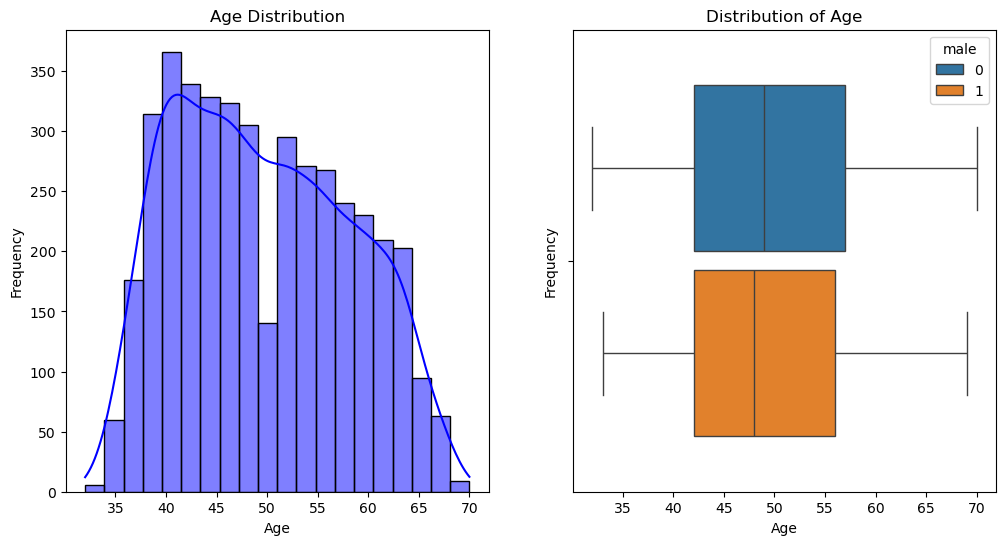

<Figure size 640x480 with 0 Axes>

In [3]:
# (a) Analyze the distribution of the age feature
plt.figure(figsize=(12, 6))

# Histogram for age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot to detect if any outliers
plt.subplot(1,2,2)
sns.boxplot(x=df['age'], hue=df['male'], gap = 0.1)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.tight_layout()
plt.show()

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [5]:
# Dropping the 'education' column bc of less relevance
df.drop(columns=['education'], inplace=True)

# Confirm if column is dropped
print("Columns after dropping 'education'", df.columns)

Columns after dropping 'education' Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [6]:
# Impute missing values (Mean for numerical and Mode for categorical)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

In [7]:
# Verify missing values are filled 
print("Missing values after imputation:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values after imputation:
male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# 1 (b)

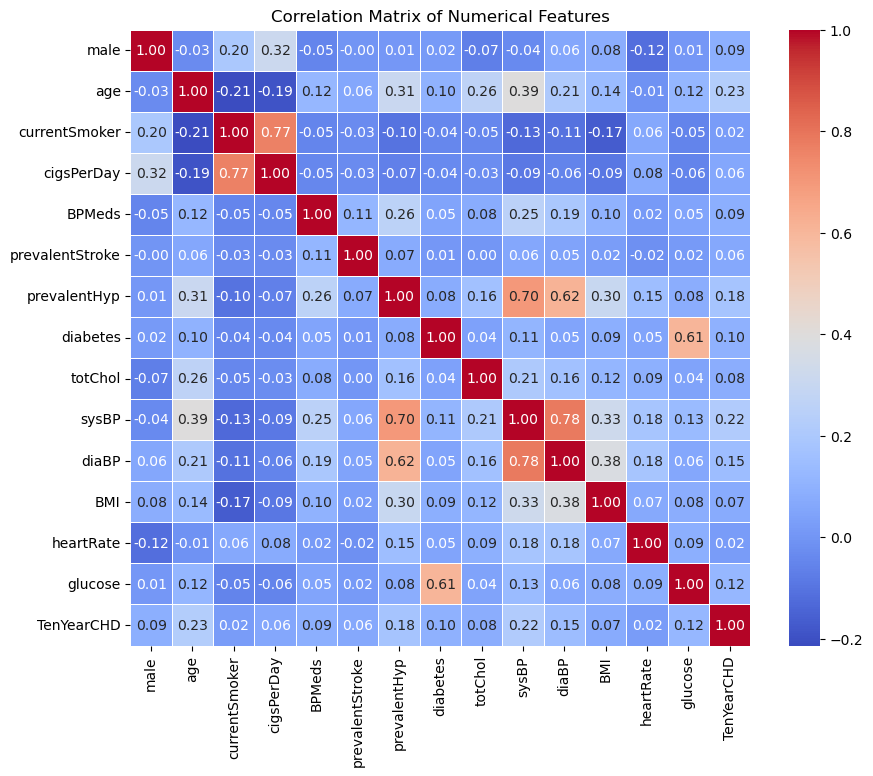

Top 3 features with strongest correlation to TenYearCHD:
TenYearCHD      1.000000
age             0.225408
sysBP           0.216374
prevalentHyp    0.177458
Name: TenYearCHD, dtype: float64


In [8]:
# (b) Examine the correlation between numerical features and the target variable (10-year risk of CHD).
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['TenYearCHD'].sort_values(ascending=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Display top correlated features
print("Top 3 features with strongest correlation to TenYearCHD:")
print(correlation_with_target.head(4))

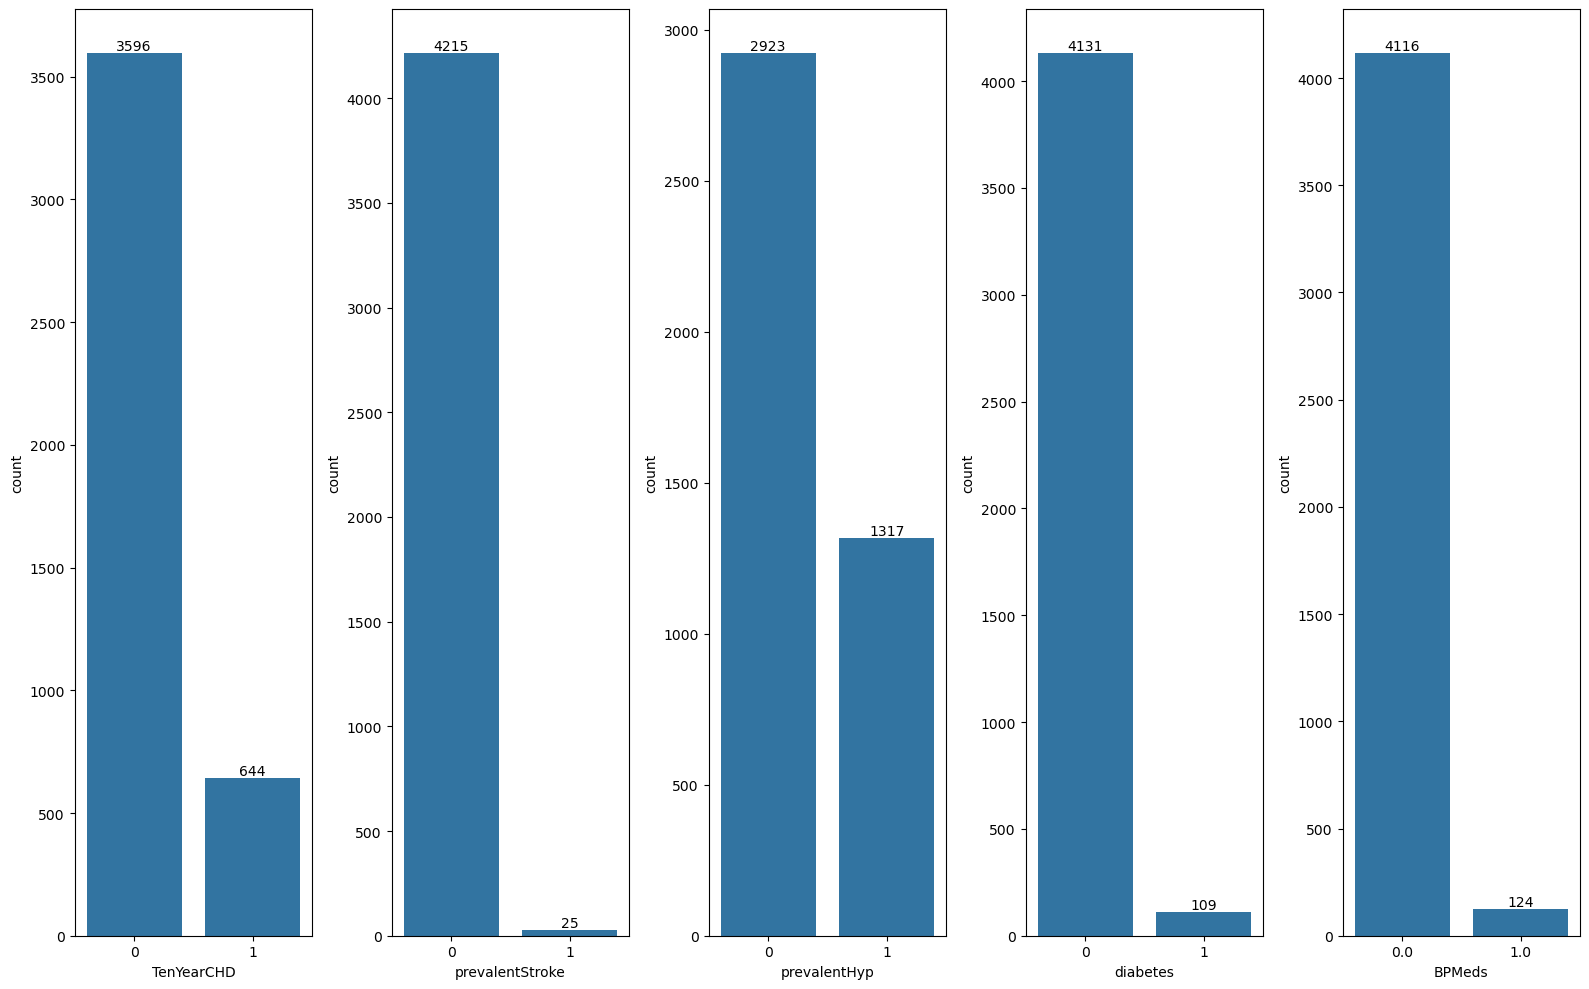

In [9]:
fig , axes = plt.subplots(1, 5, figsize = (16,10) )

ax = sns.countplot(x = df['TenYearCHD'], data = df, ax = axes[0])
ax.bar_label(ax.containers[0])

ax = sns.countplot(x = df['prevalentStroke'], data = df, ax = axes[1])
ax.bar_label(ax.containers[0])

ax = sns.countplot(x = df['prevalentHyp'], data = df, ax = axes[2])
ax.bar_label(ax.containers[0])

ax = sns.countplot(x = df['diabetes'], data = df, ax = axes[3])
ax.bar_label(ax.containers[0])

ax = sns.countplot(x = df['BPMeds'], data = df, ax = axes[4])
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

# 1 (c)

In [10]:
#(c) Identify any categorical features that might have imbalanced classes.
categorical_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

for feature in categorical_features:
    print(f"Class distribution for {feature}:")
    print(df[feature].value_counts(normalize=True))
    print()

Class distribution for male:
male
0    0.570755
1    0.429245
Name: proportion, dtype: float64

Class distribution for currentSmoker:
currentSmoker
0    0.505896
1    0.494104
Name: proportion, dtype: float64

Class distribution for BPMeds:
BPMeds
0.0    0.970755
1.0    0.029245
Name: proportion, dtype: float64

Class distribution for prevalentStroke:
prevalentStroke
0    0.994104
1    0.005896
Name: proportion, dtype: float64

Class distribution for prevalentHyp:
prevalentHyp
0    0.689387
1    0.310613
Name: proportion, dtype: float64

Class distribution for diabetes:
diabetes
0    0.974292
1    0.025708
Name: proportion, dtype: float64

Class distribution for TenYearCHD:
TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64



### Balanced Features
- **male**: ~57% are male, and ~43% are female. Well-balanced.
- **currentSmoker**: ~50.6% are non-smokers, and ~49.4% are smokers. Balanced.

### Imbalanced Features
- **BPMeds**: ~97% do not take medication, and ~3% do. Highly imbalanced.
- **prevalentStroke**: ~99.4% have no history of stroke, and ~0.6% have. Highly imbalanced.
- **diabetes**: ~97% do not have diabetes, and ~3% do. Highly imbalanced.
- **TenYearCHD**: ~85% have no CHD risk, and ~15% are at risk. Moderately imbalanced.

### Moderately Balanced
- **prevalentHyp**: ~69% are not hypertensive, and ~31% are. Moderately balanced.

### Impact of Imbalanced Classes
- **Feature Bias**: Imbalanced features like BPMeds, prevalentStroke, and diabetes may cause bias.
- **Target Bias**: Moderate imbalance in TenYearCHD might lead to predicting "No CHD" frequently.

### Techniques to Handle Imbalance
- **Oversampling**: Use SMOTE to generate synthetic samples for the minority class.
- **Undersampling**: Reduce samples in the majority class to balance the dataset.

# 1 (d)

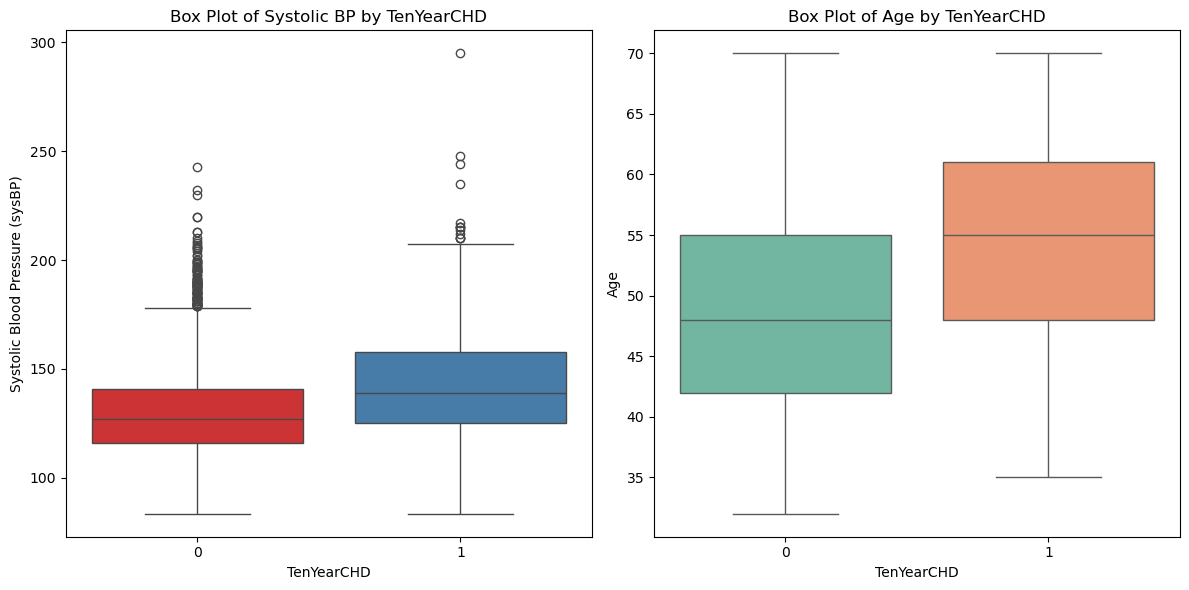

In [11]:
#(d) Visualize the relationship between two numerical features and the target variable. Provide your interpretation of the plots. (2 Marks)
# Box Plot for sysBP
plt.figure(figsize=(12, 6))

# Subplot 1: sysBP
plt.subplot(1, 2, 1)
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette='Set1')
plt.title('Box Plot of Systolic BP by TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Systolic Blood Pressure (sysBP)')

# Subplot 2: Age
plt.subplot(1, 2, 2)
sns.boxplot(x='TenYearCHD', y='age', data=df, palette='Set2')
plt.title('Box Plot of Age by TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

### Interpretation:
1. **sysBP**:
   - Median `sysBP` is higher for patients with CHD risk (`TenYearCHD = 1`).
   - IQR for `sysBP` is broader for `TenYearCHD = 1`, indicating greater variability.

2. **Age**:
   - Median age is higher for `TenYearCHD = 1`.
   - Patients with CHD risk are generally older, with fewer young patients in the high-risk category.



# **Question 2: Feature Engineering (10 Marks) <small>CO-2 PO-2</small>**

(a) Encode the categorical variables in the dataset to make them suitable for modeling. Specify the type of encoding used for each categorical feature. (3 Marks)  

(b) Perform feature scaling for numerical features where required. Justify why scaling is necessary for these features and mention which scaling technique is applied. (3 Marks)  

(c) Create a new feature using the existing ones (e.g., `Pulse Pressure = sysBP - diaBP`). Explain why this new feature might be relevant for the problem. (2 Marks)  

(d) Apply a dimensionality reduction technique (e.g., PCA) if necessary, and explain how it could help improve the model's performance. (2 Marks)  


# 2 (a)

In [12]:
# Solutions here
#(a) Encode the categorical variables in the dataset to make them suitable for modeling. Specify the type of encoding used for each categorical feature. (3 Marks)
# Check the initial data types and structure
print("Initial data types and structure:")
print(df.info())

Initial data types and structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB
None


In [13]:
# List of binary categorical columns
binary_categorical_columns = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# Convert binary categorical variables to category and then encode using category codes
for column in binary_categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Verify the data types and the first few rows after encoding
print("Data types after encoding:\n", df.dtypes)
print("\nSample of dataset after encoding binary categorical variables:\n", df[binary_categorical_columns].head())



Data types after encoding:
 male                  int8
age                  int64
currentSmoker         int8
cigsPerDay         float64
BPMeds                int8
prevalentStroke       int8
prevalentHyp          int8
diabetes              int8
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD            int8
dtype: object

Sample of dataset after encoding binary categorical variables:
    male  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0     1              0       0                0             0         0   
1     0              0       0                0             0         0   
2     1              1       0                0             0         0   
3     0              1       0                0             1         0   
4     0              1       0                0             0         0   

   TenYearCHD  
0           0  
1    

### Type of encoding
- I applied Label Encoding to all categorical variables since each of the aforementioned features is binary, meaning they contain only two unique values. Label Encoding is particularly suitable for these features, as it directly assigns each unique category a value of 0 or 1.

# 2 (b)

In [14]:
#(b) Perform feature scaling for numerical features where required.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Split the data into features (X) and target (y)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Initialize SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training set (after SMOTE) and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 5: Verify results
print("Class distribution before SMOTE (Training Set):\n", y_train.value_counts())
print("Class distribution after SMOTE (Training Set):\n", y_train_smote.value_counts())
print("\nShape of Training Set (Scaled):", X_train_scaled.shape)
print("Shape of Testing Set (Scaled):", X_test_scaled.shape)

Class distribution before SMOTE (Training Set):
 TenYearCHD
0    2517
1     451
Name: count, dtype: int64
Class distribution after SMOTE (Training Set):
 TenYearCHD
0    2517
1    2517
Name: count, dtype: int64

Shape of Training Set (Scaled): (5034, 14)
Shape of Testing Set (Scaled): (1272, 14)


### Explanation:
 - SMOTE was applied to balance the classes in the training set by oversampling the minority class.
 - Numerical features were scaled using StandardScaler to standardize their ranges for better model performance.

# 2 (c)

In [15]:
#(c) Create a new feature using the existing ones (e.g., Pulse Pressure = sysBP - diaBP). Explain why this new feature might be relevant for the problem. (2 Marks)
# Create a new feature: Pulse Pressure
df['pulsePressure'] = df['sysBP'] - df['diaBP']

# Verify the new feature
print("Sample of the dataset with the new feature 'pulsePressure':\n", df[['sysBP', 'diaBP', 'pulsePressure']].head())

Sample of the dataset with the new feature 'pulsePressure':
    sysBP  diaBP  pulsePressure
0  106.0   70.0           36.0
1  121.0   81.0           40.0
2  127.5   80.0           47.5
3  150.0   95.0           55.0
4  130.0   84.0           46.0


### Explanation:
 - Pulse Pressure (sysBP - diaBP) is a measure of arterial stiffness and an important cardiovascular risk factor.
 - Including this feature may improve the model's ability to predict CHD risk.


# **Question 3: Prediction and Model Comparison (10 Marks) <small>CO-3 PO-2 </small>**

(a) Build and train two classification models: **Logistic Regression** and **Decision Tree Classifier**. Ensure appropriate hyperparameters are used for each model. (4 Marks)  

(b) Evaluate and compare the **train** and **test set accuracies** of both models. Which model performs better on the test set? Provide reasons for any observed differences. (3 Marks)  

(c) Discuss whether the train-test accuracies for both models are consistent. If inconsistencies are observed (e.g., overfitting or underfitting), suggest one potential solution for each model. (2 Marks)  

(d) Between the two models, which one would you recommend for deployment, and why? Consider interpretability, performance, and computational efficiency in your answer. (1 Mark)  


# 3 (a)

In [16]:
#(a) Build and train two classification models: Logistic Regression and Decision Tree Classifier. Ensure appropriate hyperparameters are used for each model. (4 Marks)
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
logistic_model.fit(X_train_scaled, y_train_smote)

# Predict on the test data
logistic_y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
# Confusion Matrix
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
print("Confusion Matrix: Logistic Regression")
print(logistic_conf_matrix)

# Classification Report
logistic_class_report = classification_report(y_test, logistic_y_pred)
print("\nClassification Report: Logistic Regression")
print(logistic_class_report)

# Train and Test Accuracy
logistic_train_acc = logistic_model.score(X_train_scaled, y_train_smote)
logistic_test_acc = logistic_model.score(X_test_scaled, y_test)

print(f"\nLogistic Regression Train Accuracy: {logistic_train_acc:.2f}")
print(f"Logistic Regression Test Accuracy: {logistic_test_acc:.2f}")

Confusion Matrix: Logistic Regression
[[745 334]
 [103  90]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1079
           1       0.21      0.47      0.29       193

    accuracy                           0.66      1272
   macro avg       0.55      0.58      0.53      1272
weighted avg       0.78      0.66      0.70      1272


Logistic Regression Train Accuracy: 0.70
Logistic Regression Test Accuracy: 0.66


In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)

# Train the Decision Tree Classifier
tree_model.fit(X_train_scaled, y_train_smote)

# Predict on the test data
tree_y_pred = tree_model.predict(X_test_scaled)

# Evaluate the Decision Tree Classifier
# Confusion Matrix
tree_conf_matrix = confusion_matrix(y_test, tree_y_pred)
print("Confusion Matrix: Decision Tree")
print(tree_conf_matrix)

# Classification Report
tree_class_report = classification_report(y_test, tree_y_pred)
print("\nClassification Report: Decision Tree")
print(tree_class_report)

# Train and Test Accuracy
tree_train_acc = tree_model.score(X_train_scaled, y_train_smote)
tree_test_acc = tree_model.score(X_test_scaled, y_test)

print(f"\nDecision Tree Train Accuracy: {tree_train_acc:.2f}")
print(f"Decision Tree Test Accuracy: {tree_test_acc:.2f}")

Confusion Matrix: Decision Tree
[[562 517]
 [ 62 131]]

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.52      0.66      1079
           1       0.20      0.68      0.31       193

    accuracy                           0.54      1272
   macro avg       0.55      0.60      0.49      1272
weighted avg       0.79      0.54      0.61      1272


Decision Tree Train Accuracy: 0.70
Decision Tree Test Accuracy: 0.54


# 3 (b)

In [18]:
#(b) Evaluate and compare the train and test set accuracies of both models. Which model performs better on the test set? Provide reasons for any observed differences. (3 Marks)
# Compare Train and Test Accuracies
print("\nModel Accuracy Comparison:")
print(f"Logistic Regression Train Accuracy: {logistic_train_acc:.2f}")
print(f"Logistic Regression Test Accuracy: {logistic_test_acc:.2f}")
print(f"Decision Tree Train Accuracy: {tree_train_acc:.2f}")
print(f"Decision Tree Test Accuracy: {tree_test_acc:.2f}")

# Identify the better performing model on the test set
if logistic_test_acc > tree_test_acc:
    print("\nLogistic Regression performs better on the test set.")
else:
    print("\nDecision Tree performs better on the test set.")


Model Accuracy Comparison:
Logistic Regression Train Accuracy: 0.70
Logistic Regression Test Accuracy: 0.66
Decision Tree Train Accuracy: 0.70
Decision Tree Test Accuracy: 0.54

Logistic Regression performs better on the test set.


# 3 (c)

In [19]:
#(c) Discuss whether the train-test accuracies for both models are consistent. If inconsistencies are observed (e.g., overfitting or underfitting), suggest one potential solution for each model. (2 Marks)
# Train-Test Consistency Check
logistic_consistency = abs(logistic_train_acc - logistic_test_acc)
tree_consistency = abs(tree_train_acc - tree_test_acc)

print("\nTrain-Test Consistency Analysis:")
if logistic_consistency > 0.05:
    print("Logistic Regression: Inconsistency observed. Consider tuning the regularization parameter (C) to improve generalization.")
else:
    print("Logistic Regression: Consistent performance observed.")

if tree_consistency > 0.05:
    print("Decision Tree: Inconsistency observed. Consider reducing max_depth, applying pruning, or adjusting min_samples_split.")
else:
    print("Decision Tree: Consistent performance observed.")


Train-Test Consistency Analysis:
Logistic Regression: Consistent performance observed.
Decision Tree: Inconsistency observed. Consider reducing max_depth, applying pruning, or adjusting min_samples_split.


### Train-Test Consistency and Solutions
1. **Logistic Regression**:
   - If inconsistencies are observed, it may indicate **underfitting**.
   - Solution: Tune the regularization parameter (`C`) to balance the bias-variance tradeoff.

2. **Decision Tree**:
   - Large differences between train and test accuracy suggest **overfitting**.
   - Solutions:
     - Reduce the `max_depth` of the tree.
     - Apply **pruning** techniques.
     - Increase `min_samples_split` or `min_samples_leaf` to enforce constraints.

# 3 (d)

In [20]:
# (d) Between the two models, which one would you recommend for deployment, and why? Consider interpretability, performance, and computational efficiency in your answer. (1 Mark)
# Model Recommendation
if logistic_test_acc > tree_test_acc:
    print("\nRecommendation: Deploy Logistic Regression for better test accuracy, interpretability, and computational efficiency.")
else:
    print("\nRecommendation: Deploy Decision Tree for its ability to handle non-linear relationships and easy visualization.")


Recommendation: Deploy Logistic Regression for better test accuracy, interpretability, and computational efficiency.


### Deployment Recommendation
1. **Logistic Regression**:
   - Recommended if test accuracy is higher.
   - Advantages:
     - Easy interpretability.
     - Computationally efficient.
     - Performs well on linearly separable data.

2. **Decision Tree**:
   - Recommended if handling non-linear relationships is crucial.
   - Advantages:
     - Handles complex patterns.
     - Easy to visualize and interpret tree structure.
   - May require careful tuning to avoid overfitting.